### Loading Data

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

In [3]:
airbnb_data=pd.read_csv('AB_NYC_2019.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [9]:
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


### Data Cleaning

In [19]:
airbnb_data.shape

(48895, 16)

In [28]:
airbnb_data.nunique()

id                                48895
name                              47896
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [20]:
airbnb_data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [21]:
airbnb_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.095022,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.594493,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [3]:
100*airbnb_data.isnull().mean()

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [4]:
airbnb_data["last_review"]=airbnb_data["last_review"].fillna(airbnb_data["last_review"].mode()[0])
airbnb_data["reviews_per_month"]=airbnb_data["reviews_per_month"].fillna(airbnb_data["reviews_per_month"].median())
airbnb_data["name"]=airbnb_data["name"].fillna(airbnb_data["name"].mode()[0])
airbnb_data["host_name"]=airbnb_data["host_name"].fillna(airbnb_data["host_name"].mode()[0])

In [5]:
100*airbnb_data.isnull().mean()

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

### Dealing with data

In [5]:
airbnb_data['longitude']= abs(airbnb_data['longitude'])
airbnb_data['longitude'].describe()

count    48895.000000
mean        73.952170
std          0.046157
min         73.712990
25%         73.936275
50%         73.955680
75%         73.983070
max         74.244420
Name: longitude, dtype: float64

In [4]:
airbnb_data['availability_365']=airbnb_data['availability_365'].apply(lambda x:365 if x>365 else x)

In [46]:
airbnb_data.sort_values(by='availability_365', ascending=False).head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
11591,9024549,Spacious & Lofted in Williamsburg,8313697,Koppel,Brooklyn,Park Slope,40.67300,73.98076,Private room,120,20,0,23-06-2019,0.02,1,365
41757,32467835,SPACIOUS & COMFY 3 BDROM/2 BATH APT CLOSE 2 SU...,216419980,Billie,Manhattan,Harlem,40.82420,73.95106,Entire home/apt,112,30,0,23-06-2019,0.02,1,365
41747,32466179,Sonder | The Nash | Classic 1BR + Fitness Center,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74898,73.97534,Entire home/apt,202,29,0,23-06-2019,0.02,327,365
41742,32463948,Amazing East Village Loft,238779678,Dustin,Manhattan,East Village,40.72704,73.98916,Private room,55,30,0,23-06-2019,0.02,9,365


### Segmentation of Dataset

In [8]:
airbnb_data.nunique()

id                                48895
name                              47896
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [9]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
cat_cols_airbnb = ['neighbourhood_group','room_type']
cont_cols_airbnb = ['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
id_cols = ['id']

### Outlier checking

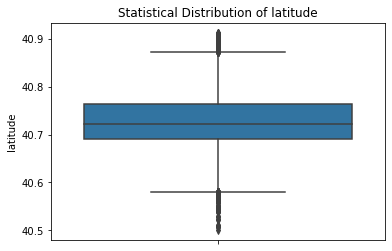

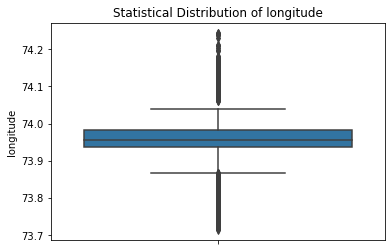

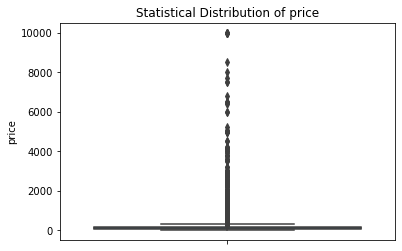

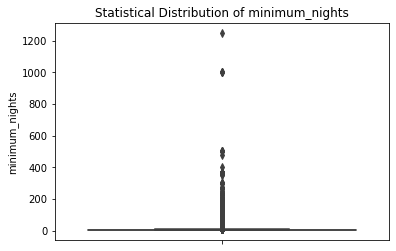

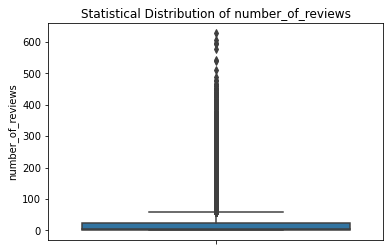

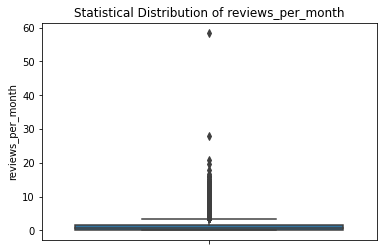

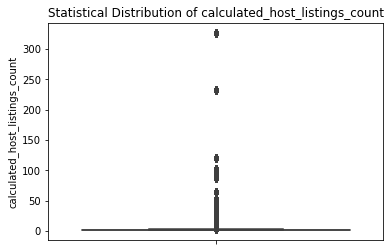

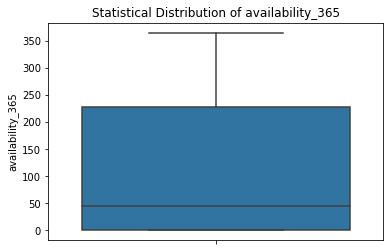

In [7]:
for i in cont_cols_airbnb:
    sns.boxplot(y=airbnb_data[i])
    plt.title("Statistical Distribution of "+i)
    plt.show()

### Checking for data imbalance in dataset

neighbourhood_group


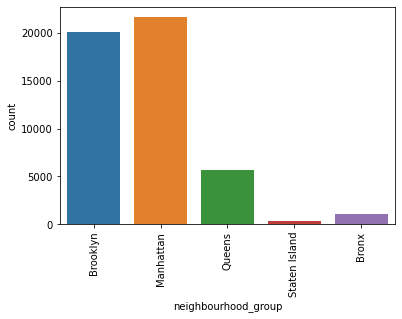

room_type


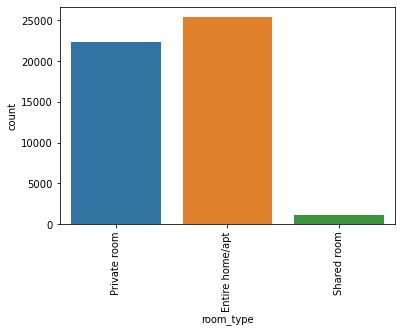

In [8]:
for i in cat_cols_airbnb:
    print(i)
    sns.countplot(airbnb_data[i])
    plt.xticks(rotation=90)
    plt.show()

## Data Analysis and Visualization

### Analysis host_id 

In [10]:
airbnb_data.host_id.value_counts().iloc[:10]

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

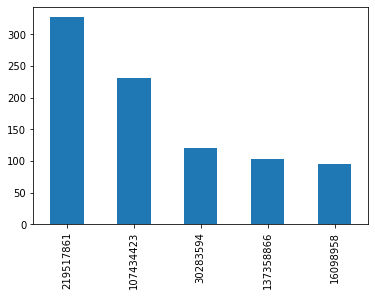

In [50]:
airbnb_data.host_id.value_counts().iloc[:5].plot(kind = 'bar')
plt.show()

#### Here we notice that highest number of stays by a host is 327 out of 365 days.

### Analysis neighbourhood_group 

In [12]:
airbnb_data['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

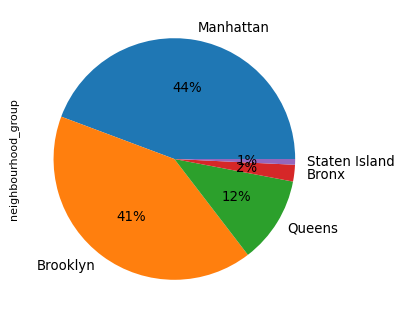

In [49]:
fig = plt.figure(figsize=(5,5), dpi=80)
airbnb_data['neighbourhood_group'].value_counts().plot(kind='pie', autopct='%1.0f%%', startangle=360, fontsize=12)
plt.show()

#### In Manhattan(44%) and Brooklyn(41%) cities most Airbnb transactions happens.
#### In Staten Island city(1%) least Airbnb transactions happens.

### Analysis neighbourhood

In [6]:
airbnb_data['neighbourhood'].value_counts().iloc[:10]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

In [8]:
airbnb_data['neighbourhood'].unique()


array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

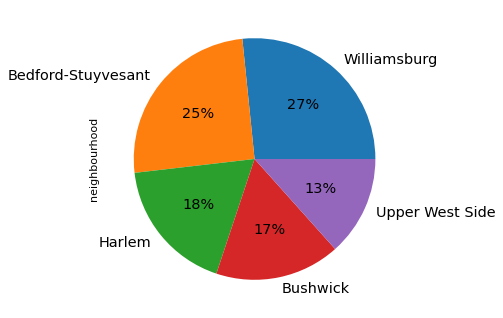

In [10]:
fig = plt.figure(figsize=(5,5), dpi=80)
airbnb_data['neighbourhood'].value_counts().iloc[:5].plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)
plt.show()

#### We can see that Williamsburg is the area where high number of transaction happens.

### Analysis of room_type

In [11]:
airbnb_data['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

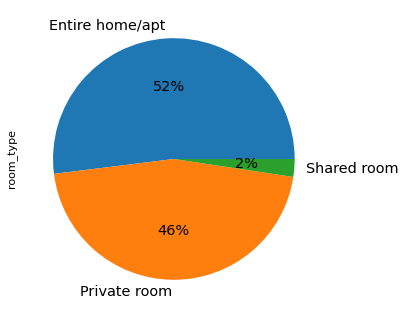

In [12]:
fig = plt.figure(figsize=(5,5), dpi=80)
airbnb_data['room_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)
plt.show()

#### Around 25k people (52%) choose to use a house/apt while 22k(46%) for a private room. Only 1k(2%) people choose a shared room. This could mean more people who use airbnb, use it with family maybe for tours,visits,etc.

### Analysis of price 

In [16]:
airbnb_data.price.value_counts().iloc[:10]

100    2051
150    2047
50     1534
60     1458
200    1401
75     1370
80     1272
65     1190
70     1170
120    1130
Name: price, dtype: int64

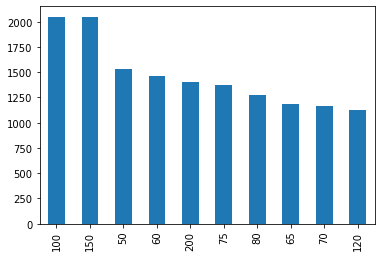

In [15]:
airbnb_data.price.value_counts().iloc[:10].plot(kind = 'bar')
plt.show()

In [14]:
airbnb_data.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

#### The average pricing is around 152 dollars.
#### 50% of data has price greater than 106 dollars.
#### The costliest airbnb has around 10k dollars as price.

In [13]:
airbnb_data[airbnb_data['price'] == 10000.000000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,13-02-2016,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,27-07-2017,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,23-06-2019,0.72,1,83


#### We have 3 airbnbs with 10k per night luxury stay, one private room and 2 home stay.

### Analysis of minimum_nights

In [17]:
airbnb_data['minimum_nights'].value_counts()

1       12720
2       11696
3        7999
30       3760
4        3303
5        3034
7        2058
6         752
14        562
10        483
29        340
15        279
20        223
28        203
31        201
21        135
8         130
60        106
90        104
12         91
25         82
9          80
13         54
180        43
11         33
45         32
365        29
120        28
18         28
16         18
27         17
26         16
100        15
35         15
24         14
17         14
50         14
40         13
80          9
19          8
32          8
22          8
23          8
70          8
59          6
300         6
150         6
360         5
500         5
200         4
75          4
55          4
999         3
62          3
91          3
110         3
240         3
93          2
160         2
47          2
88          2
105         2
33          2
53          2
115         2
181         2
210         2
270         2
44          2
133         2
56          2
99    

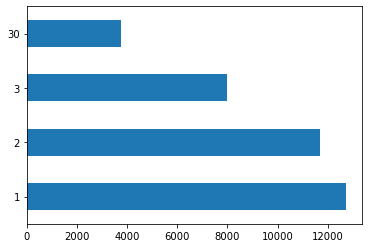

In [18]:
airbnb_data['minimum_nights'].value_counts().iloc[:4].plot(kind = 'barh')
plt.show()

#### We can observe that most of almost 12k people used 1 night stay in airbnb.
#### 11k people choose 2 night stay while 7k choose 3 night stay.
#### Almost 3.7k stayed upto a month.

### Analysis of availability_365

In [19]:
airbnb_data['availability_365'].value_counts()

0      17533
365     1295
364      491
1        408
89       361
5        340
3        306
179      301
90       290
2        270
6        245
363      239
8        233
4        233
342      230
188      225
7        219
88       200
311      199
341      199
9        193
180      192
83       183
358      180
14       173
11       173
12       172
332      171
35       168
362      166
10       165
13       162
15       159
189      157
310      156
333      154
16       151
87       150
66       143
36       141
23       135
359      135
19       135
20       134
157      134
343      134
34       134
24       131
32       130
17       130
22       129
21       128
31       127
38       125
18       125
281      123
177      120
37       119
249      118
280      114
64       113
29       113
67       112
361      111
43       111
345      111
331      110
81       110
339      109
84       108
30       108
28       108
347      105
173      105
325      104
156      104
326      103

In [20]:
airbnb_data[airbnb_data['availability_365'] == 365].describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.295000e+03,1.295000e+03,1295.000000,1295.000000,1295.000000,1295.00000,1295.000000,1295.000000,1295.000000,1295.0
mean,1.940195e+07,8.554698e+07,40.729014,-73.943275,250.769884,19.60000,10.220849,0.793089,13.158301,365.0
std,1.197265e+07,8.786960e+07,0.057781,0.059799,550.497373,65.05093,22.095983,0.897942,36.224171,0.0
min,2.539000e+03,2.787000e+03,40.507080,-74.242850,20.000000,1.00000,0.000000,0.010000,1.000000,365.0
25%,8.725256e+06,8.931349e+06,40.687990,-73.983210,72.000000,1.00000,0.000000,0.240000,1.000000,365.0
50%,2.065068e+07,4.634351e+07,40.730990,-73.954270,125.000000,3.00000,2.000000,0.720000,2.000000,365.0
75%,3.027040e+07,1.565055e+08,40.762095,-73.921715,225.000000,30.00000,10.000000,0.720000,7.000000,365.0
max,3.648315e+07,2.733930e+08,40.893740,-73.721730,9999.000000,1250.00000,183.000000,8.940000,327.000000,365.0


#### Costliest airbnb with 365 days availablity costs around 10k dollars with average of 250 dollars.

### Analysis of reviews_per_month

In [22]:
airbnb_data['reviews_per_month'].max()

58.5

In [23]:
airbnb_data[airbnb_data['reviews_per_month'] == 58.5]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,07-07-2019,58.5,9,299


#### Enjoy great views in Manhattan has the highest reviews per month. They offer Private room and is worth 100 dollars a night.

## Bivariate Analysis

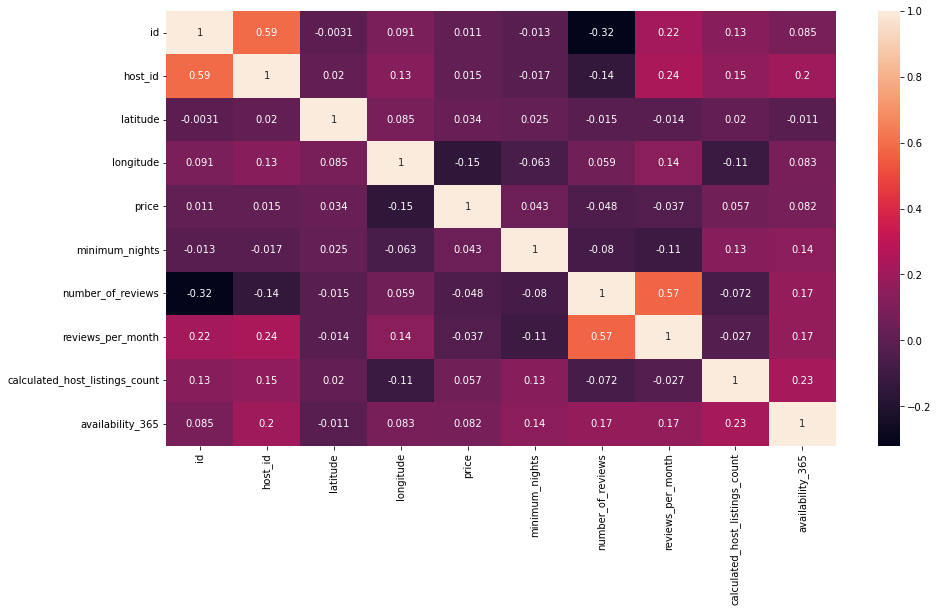

In [25]:
corr = airbnb_data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
plt.show()

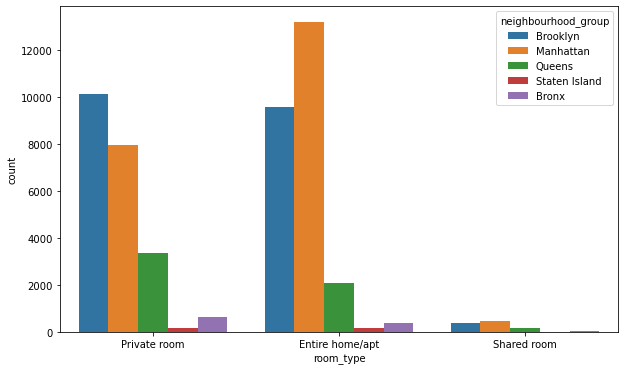

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(data = airbnb_data, x = 'room_type', hue = 'neighbourhood_group')
plt.show()

#### Home service seems to be most used by people and the highest in Manhattan. This is also the highest service used across New York City.

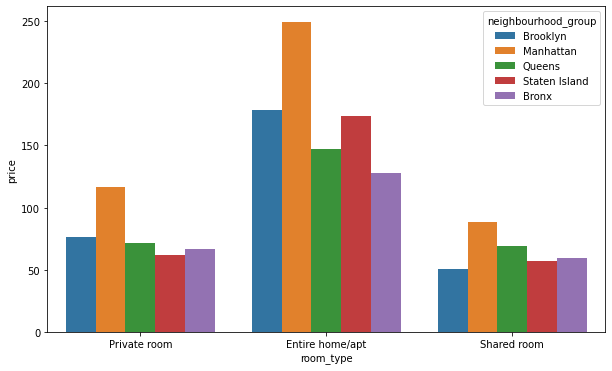

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'room_type',
            y = 'price',
            hue = 'neighbourhood_group',
            data = airbnb_data, ci=0)
plt.show()

#### Manhattan has the most expensive rental properties, while Bronx has the least expensive.

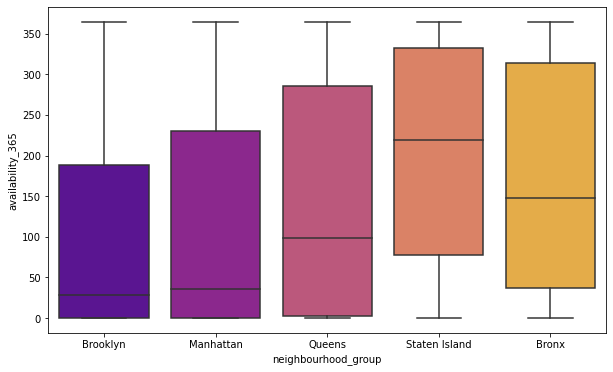

In [29]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=airbnb_data, x='neighbourhood_group',y='availability_365',palette='plasma')
plt.show()

#### Staten Island has th highest average airbnb availablity.

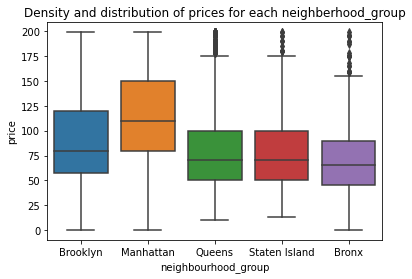

In [30]:
v2=sns.boxplot(data=airbnb_data[airbnb_data.price < 200], x='neighbourhood_group', y='price')
v2.set_title('Density and distribution of prices for each neighberhood_group')
plt.show()

#### Manhattan airbnb's has the highest average price.

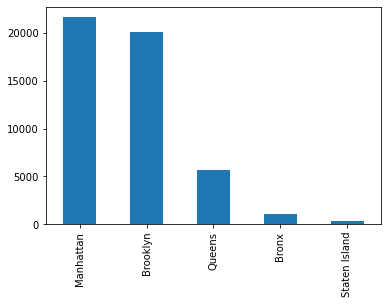

In [32]:
airbnb_dataR=airbnb_data.sort_values(by=['number_of_reviews'],ascending=False)
airbnb_dataR['neighbourhood_group'].value_counts().plot(kind = 'bar')
plt.show()

#### Manhattan and Brooklyn got highest reviews respectively.